<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Tarea 1: Conceptos Básicos</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Presentado por: Julian Camilo Mendez Corredor</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: jucmendezco@unal.edu.co</p>

<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="Fig/Escudo_UN.png",width=100,height=100>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>19 de Febrero de 2017</p>

<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
TAREA 1 </h1>

<ol style="font-size:120%; line-height : 35px;">
    <li>
        <h3>Estudiar e implementar las principales técnicas de interpolación:</h3>
        <ul>
            <li>Vecino más cercano.</li>
            <li>Bilineal.</li>
            <li>Bicubica.</li>
            <li>B-splines.</li>
       </ul>
    </li>
    <li>
        <h3>Evaluar cuantitativamente el desempeño de las técnicas de interpolación implementadas</h3>
    </li>
    <li>
        <h3>Desarrollar una función para rotar de imágenes, cuyo parámetro de entrada sea el ángulo de rotación y cuya salida sea la imagen rotada y debidamente interpolada.</h3>
    </li>
</ol>



<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
Punto 1 </h1>

<h1 style="font-size:200%;"> <span style="color:blue">Vecino mas cercano</span> </h1>

<ul style="font-size:170%; line-height : 35px;">
  <li>Para la implementacion de esta funcion consta de recorrer la imagen destino de la siguiente forma: </li> <br>
  PixelEnImagenFuente = PixelEnImagenDestino / Escalar <br><br>
  <li>A partir de esta formula, aseguramos que no existen pixeles vacios.</li>
  <li>Nuestra funcion recibe un escalar que nos indica el factor de incremento del tamaño de la imagen</li>
  <li>Dicho escalar multiplicara el tamaño de la imagen original </li>
</ul>



In [1]:
##Funcion que nos permite obtener un pixel en determinada posicion
##Si la posicion no existe, nos devuelve un 0
def obtPixelEn(imagen,y,x):
    alto, ancho = imagen.shape[:2]
    if(x<ancho and x>=0):
        if(y<alto and y>=0):
            return int(imagen[y,x])   
    return int(0);

import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

##Inicializacion de la imagen
imagen1 = cv2.imread('Ej/example2.jpg',0)
alto1, ancho1 = imagen1.shape[:2]
##Tomamos una pequeña porcion de la imagen
recorte1 = imagen1[(alto1/2)-10:(alto1/2)+10, (ancho1/2)-20:(ancho1/2)+20]

In [2]:
##Interpolacion por el vecino mas proximo
def reEscaladoVecino(imagen, escala):
    alto, ancho = imagen.shape[:2]
    ##Creamos la matriz de la imagen destino
    destImagen = np.zeros(((alto*escala), (ancho*escala)), np.uint8)
    destAncho = ancho * escala
    destAlto = alto * escala   
    for x in range(destAncho):
        ##Cada punto x en la imagen destino tiene un equivalente en la imagen fuente
        fuentX=x/escala
        for y in range(destAlto):
            ##Cada punto y en la imagen destino tiene un equivalente en la imagen fuente
            fuentY=y/escala
            ##Asignamos el valor
            destImagen [y,x]=obtPixelEn(imagen,fuentY,fuentX);
    return destImagen

<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
Comparacion </h1>

<h1 style="font-size:200%;"> <span style="color:blue">Vecino mas cercano</span> </h1>

<ul style="font-size:170%; line-height : 35px;">
  <li>A continuacion se muestra la comparacion del metodo implementado contra la funcion de PLT </li>
  
  <li>Esta comparacion se realiza con una imagen x4</li>
  
</ul>



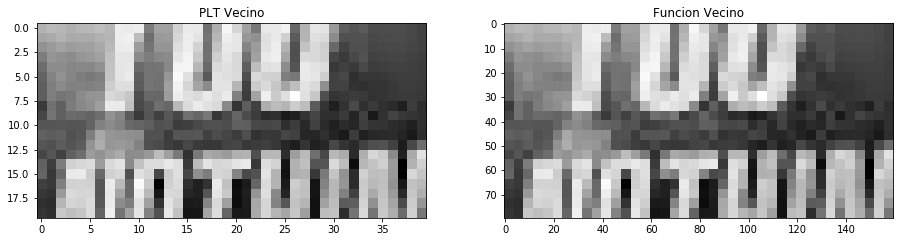

In [3]:
res1=reEscaladoVecino(recorte1,4)
plt.figure(1,figsize=(14,14))
plt.subplot(121), plt.imshow(recorte1, cmap=plt.cm.gray), plt.title('PLT Vecino')
plt.subplot(122), plt.imshow(res1, cmap=plt.cm.gray), plt.title('Funcion Vecino')
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.35, wspace=0.2)
plt.show()

<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
Punto 1 </h1>

<h1 style="font-size:200%;"> <span style="color:blue">Interpolacion Bi-linear</span> </h1>

<ul style="font-size:170%; line-height : 35px;">
  <li>Para la implementacion de esta funcion se realizan funciones lineales entre un par de puntos </li>
  <li>Estas funciones se realizan primero para un eje y luego se generalizan para 2 ejes</li>
  <li>Esta funcion que evalua 2 vecinos (en un solo eje) asigna los pesos de cada pixel dependiendo de su distancia al nuevo punto</li>
  <li>Al multiplicar la imagen fuente por el escalar, nos encontramos con algunos pixeles al borde de la imagen que contienen inforacion inutil y por ello se eliminan </li>
</ul>



In [4]:
##Funcion que nos permite obtener un promedio sobre 2 pixeles reales
def prom2vecinos (p0, p1, dist):
    return float(p0)* (float(1) -float(dist)) + (float(p1)*float(dist))

##Interpolacion Bilinear
def reEscaladoBilinear(imagen, escala):
    alto, ancho = imagen.shape[:2]
    
    ##La imagen destino no utiliza los pixeles del borde pues estos no poseen informacion 
    destAncho = ((ancho) * escala)-(escala-1)
    destAlto = ((alto) * escala)-(escala-1)
    ##Creamos la matriz de la imagen destino
    destImagen = np.zeros((destAlto,destAncho), np.uint8)
    for x in range(destAncho):
        ##Cada punto x en la imagen destino tiene un equivalente en la imagen fuente
        fuentX=float(x)/float(escala)
        for y in range(destAlto):
            ##Cada punto y en la imagen destino tiene un equivalente en la imagen fuente
            fuentY=float(y)/float(escala)
            
            ##Medimos las distancias entre pixeles
            xDist=fuentX-int(fuentX)
            yDist=fuentY-int(fuentY)
            
            ##Guardamos 4 puntos para realizar la interpolacion
            p00 = imagen[int(fuentY),int(fuentX)]
            p10 = obtPixelEn(imagen,int(fuentY)+1,int(fuentX))
            p01 = obtPixelEn(imagen,int(fuentY),int(fuentX)+1)
            p11 = obtPixelEn(imagen,int(fuentY)+1,int(fuentX)+1)
          
            ##Evaluamos primero la funcion en un solo eje
            col0 = prom2vecinos(p00,p10,yDist)
            col1 = prom2vecinos(p01,p11,yDist)
            
            ##Despues para el otro eje
            valor = prom2vecinos (col0,col1,xDist)
            ##Asignamos el valor
            destImagen[y,x]=valor
            
    return destImagen

<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
Comparacion </h1>

<h1 style="font-size:200%;"> <span style="color:blue">Bi-linear</span> </h1>

<ul style="font-size:170%; line-height : 35px;">
  <li>A continuacion se muestra la comparacion del metodo implementado contra la funcion de PLT </li>
  
  <li>Esta comparacion se realiza con una imagen x4</li>
  
</ul>

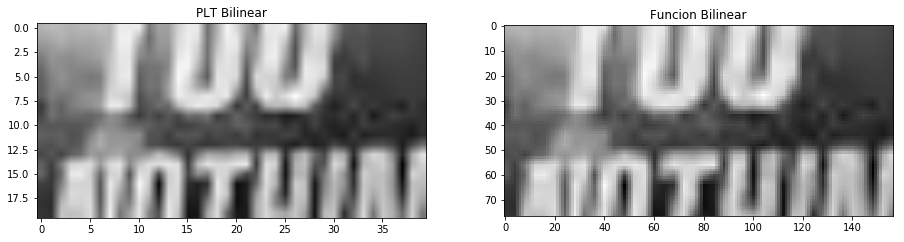

In [5]:
res2=reEscaladoBilinear(recorte1,4)
plt.figure(1,figsize=(14,14))
plt.subplot(121), plt.imshow(recorte1, cmap=plt.cm.gray, interpolation='bilinear'), plt.title('PLT Bilinear')
plt.subplot(122), plt.imshow(res2, cmap=plt.cm.gray), plt.title('Funcion Bilinear')
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.35, wspace=0.2)
plt.show()

<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
Punto 1 </h1>

<h1 style="font-size:200%;"> <span style="color:blue">Interpolacion Bi-cubica</span> </h1>

<ul style="font-size:170%; line-height : 35px;">
  <li>Para la implementacion de esta funcion se realizan funciones cubicas para 4 pixeles </li>
  <li>Estas funciones se realizan primero para un eje y luego se generalizan para 2 ejes</li>
  <li>Esta funcion que evalua 4 vecinos (en un solo eje) asigna los pesos de cada pixel dependiendo de su distancia al nuevo punto</li>
  <li>Al final, cada pixel de la imagen destino tendra un promedio de valores de 16 pixeles de la imagen fuente, lo que de alguna manera asegura que las transiciones sean mas suaves
</ul>



In [6]:
##Funcion que nos permite obtener un promedio sobre 4 pixeles reales
def prom4vecinos (p0,p1,p2,p3,dist):
    return p1 + 0.5 * dist*(p2 - p0+ dist*(2.0*p0 - 5.0*p1 + 4.0*p2 - p3 + dist*(3.0*(p1 - p2) + p3 - p0)))

##Interpolacion Bicubica
def reEscaladoBicubico(imagen, escala):
    alto, ancho = imagen.shape[:2]
    ##La imagen destino no utiliza los pixeles del borde pues estos no poseen informacion
    destAncho = ((ancho) * escala)-(escala-1)
    destAlto = ((alto) * escala)-(escala-1)
    ##Creamos la matriz de la imagen destino
    destImagen = np.zeros((destAlto,destAncho), np.uint8)
    for x in range(destAncho):
        ##Cada punto x en la imagen destino tiene un equivalente en la imagen fuente
        fuentX=float(x)/float(escala)
        for y in range(destAlto):
            ##Cada punto y en la imagen destino tiene un equivalente en la imagen fuente
            fuentY=float(y)/float(escala)
            ##Medimos las distancias entre pixeles
            xDist=fuentX-int(fuentX)
            yDist=fuentY-int(fuentY)
            
            ##Guardamos 16 puntos para realizar la interpolacion
            p00 = obtPixelEn(imagen,int(fuentY)-1,int(fuentX)-1)
            p10 = obtPixelEn(imagen,int(fuentY),int(fuentX)-1)
            p20 = obtPixelEn(imagen,int(fuentY)+1,int(fuentX)-1)
            p30 = obtPixelEn(imagen,int(fuentY)+2,int(fuentX)-1)
            
            p01 = obtPixelEn(imagen,int(fuentY)-1,int(fuentX))
            p11 = obtPixelEn(imagen,int(fuentY),int(fuentX))
            p21 = obtPixelEn(imagen,int(fuentY)+1,int(fuentX))
            p31 = obtPixelEn(imagen,int(fuentY)+2,int(fuentX))
            
            p02 = obtPixelEn(imagen,int(fuentY)-1,int(fuentX)+1)
            p12 = obtPixelEn(imagen,int(fuentY),int(fuentX)+1)
            p22 = obtPixelEn(imagen,int(fuentY)+1,int(fuentX)+1)
            p32 = obtPixelEn(imagen,int(fuentY)+2,int(fuentX)+1)
            
            p03 = obtPixelEn(imagen,int(fuentY)-1,int(fuentX)+2)
            p13 = obtPixelEn(imagen,int(fuentY),int(fuentX)+2)
            p23 = obtPixelEn(imagen,int(fuentY)+1,int(fuentX)+2)
            p33 = obtPixelEn(imagen,int(fuentY)+2,int(fuentX)+2)
            
            ##Evaluamos primero la funcion en un solo eje
            col0 = prom4vecinos(p00,p10,p20,p30,yDist)
            col1 = prom4vecinos(p01,p11,p21,p31,yDist)
            col2 = prom4vecinos(p02,p12,p22,p32,yDist)
            col3 = prom4vecinos(p03,p13,p23,p33,yDist)
            ##Despues para el otro eje
            valor = prom4vecinos (col0,col1,col2,col3,xDist)
            
            ##Asignamos el valor
            destImagen[y,x]=valor
            ##Si la interpolacion arroja valores invalidos, los redondeamos
            if(valor>255):
                destImagen[y,x]=255
            if(valor<0):
                destImagen[y,x]=0
            
            
    return destImagen

<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
Comparacion </h1>

<h1 style="font-size:200%;"> <span style="color:blue">Bi-cubica</span> </h1>

<ul style="font-size:170%; line-height : 35px;">
  <li>A continuacion se muestra la comparacion del metodo implementado contra la funcion de PLT </li>
  
  <li>Esta comparacion se realiza con una imagen x4</li>
  
</ul>

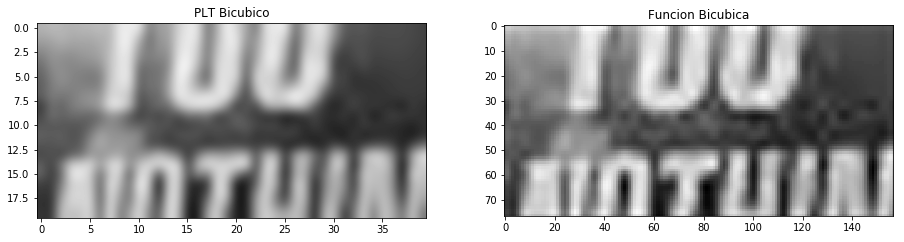

In [7]:
res3=reEscaladoBicubico(recorte1,4)
plt.figure(1,figsize=(14,14))
plt.subplot(121), plt.imshow(recorte1, cmap=plt.cm.gray, interpolation='bicubic'), plt.title('PLT Bicubico')
plt.subplot(122), plt.imshow(res3, cmap=plt.cm.gray), plt.title('Funcion Bicubica')
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.35, wspace=0.2)
plt.show()

<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
Punto 2 </h1>

<h1 style="font-size:200%;"> <span style="color:blue">Analisis</span> </h1>

<ul style="font-size:170%; line-height : 35px;">
  <li>A continuacion, observamos todos los metodos de interpolacion implementeados</li>
  <li>Para cada metodo se cambio el tamaño de la imagen, se agrando 4 veces (x4) </li>
  <li>Tambien agregamos la interpolacion Splines(funcion de PLT)</li>
  
  
  
</ul>

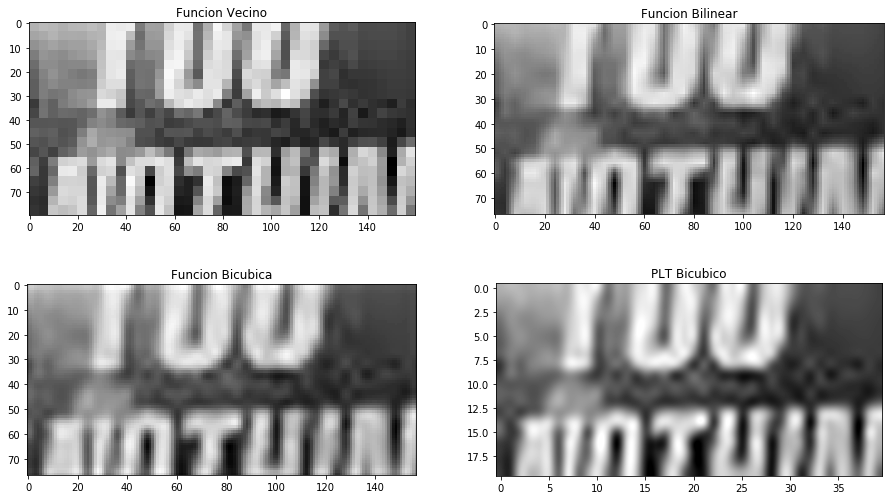

In [8]:
plt.figure(1,figsize=(14,7))
plt.subplot(221), plt.imshow(res1, cmap=plt.cm.gray), plt.title('Funcion Vecino')
plt.subplot(222), plt.imshow(res2, cmap=plt.cm.gray), plt.title('Funcion Bilinear')
plt.subplot(223), plt.imshow(res3, cmap=plt.cm.gray), plt.title('Funcion Bicubica')
plt.subplot(224), plt.imshow(recorte1, cmap=plt.cm.gray, interpolation='spline36'), plt.title('PLT Bicubico')
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.35, wspace=0.2)
plt.show()

<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
Punto 2 </h1>

<h1 style="font-size:200%;"> <span style="color:blue">Analisis</span> </h1>

<ul style="font-size:170%; line-height : 35px;">
  <li>Para esta primera prueba, observamos que para el metodo del vecino mas cercano la imagen se pixela casi en su totalidad</li>
  <li>Los metodos de interpolacion Bi-cubico y Bi-linear resultan tener un resultado parecido</li>
  <li>El metodo Spline es la imagen que menos se pixela</li>
  <li>A continuacion, realizaremos otra prueba pero esta vez aumentando las imagenes hasta 10 veces mas grandes (x10) y ademas con una porcion de la foto aun mas pequeño</li>
  
  
  
</ul>

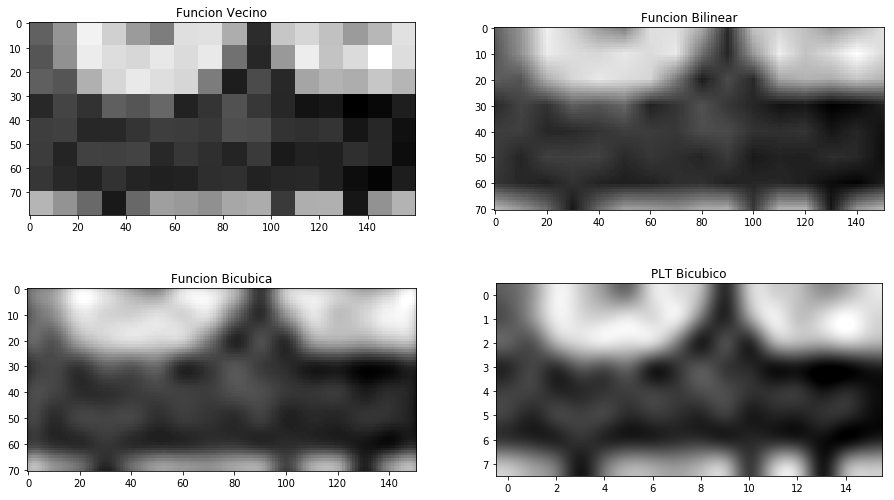

In [9]:
recorte2 = imagen1[(alto1/2)-4:(alto1/2)+4, (ancho1/2)-8:(ancho1/2)+8]
res2=reEscaladoBilinear(recorte2,10)
res3=reEscaladoBicubico(recorte2,10)
res1=reEscaladoVecino(recorte2,10)
plt.figure(1,figsize=(14,7))
plt.subplot(221), plt.imshow(res1, cmap=plt.cm.gray), plt.title('Funcion Vecino')
plt.subplot(222), plt.imshow(res2, cmap=plt.cm.gray), plt.title('Funcion Bilinear')
plt.subplot(223), plt.imshow(res3, cmap=plt.cm.gray), plt.title('Funcion Bicubica')
plt.subplot(224), plt.imshow(recorte2, cmap=plt.cm.gray, interpolation='spline36'), plt.title('PLT Bicubico')
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.35, wspace=0.2)
plt.show()

<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
Punto 2 </h1>

<h1 style="font-size:200%;"> <span style="color:blue">Analisis</span> </h1>

<ul style="font-size:170%; line-height : 35px;">
  <li>Para esta segunda prueba, observamos que el metodo Bi-linear empieza a mostrar cierto grado de pixelacion en los cambios de color, estas transiciones resultan mas bruscas y empiezan a aparecer lineas tanto horizontales como verticales
  <li>El metodo de interpolacion Bi-cubica resulta muy parecido al metodo Spline</li>
  <li>El metodo Spline continua siendo visualmente el mejor</li>
  <li>A continuacion, realizaremos pruebas de tiempo para cada metodo </li>
  
  
  
</ul>

In [10]:
from time import time
def medirReEscalado(escala):
    tiempo_inicial = time() 
    reEscaladoBicubico(recorte1,escala)
    tiempo_final = time()  
    tiempo_ejecucion = tiempo_final - tiempo_inicial
    tc = tiempo_ejecucion

    tiempo_inicial = time() 
    reEscaladoBilinear(recorte1,escala)
    tiempo_final = time()  
    tiempo_ejecucion = tiempo_final - tiempo_inicial
    tl = tiempo_ejecucion

    tiempo_inicial = time() 
    reEscaladoVecino(recorte1,escala)
    tiempo_final = time()  
    tiempo_ejecucion = tiempo_final - tiempo_inicial
    tv= tiempo_ejecucion
    return tv,tl,tc
print medirReEscalado(2)
print medirReEscalado(4)
print medirReEscalado(10)
print medirReEscalado(20)


(0.003999948501586914, 0.031999826431274414, 0.1100001335144043)
(0.01900005340576172, 0.1269998550415039, 0.40799999237060547)
(0.11999988555908203, 0.7730000019073486, 2.385000228881836)
(0.45599985122680664, 3.0, 9.325000047683716)


<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
Punto 2 </h1>

<h1 style="font-size:200%;"> <span style="color:blue">Analisis</span> </h1>

<ul style="font-size:170%; line-height : 35px;">
  <li>Para el analisis de tiempo, la primera columna representa los tiempos para la interpolacion del vecino mas cercano, la segunda corresponde a la bi-linear y la tercera a la Bi-cubica
  <li>Las filas representan (en orden), reescalados x2, x4, x10 y x20</li>
  <li>Aqui basicamente observamos que la interpolacion del vecino mas proximo resulta ser muy rapida, mientras que la Bi-cubica es la mas demorada</li>
  
  
  
</ul>

<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
Punto 2 </h1>

<h1 style="font-size:200%;"> <span style="color:blue">Conclusion</span> </h1>

<ul style="font-size:170%; line-height : 35px;">
  <li>La interpolacion Bi-cubica resulta ser muy buena graficamente, sin embargo, toma demasiado tiempo y para imagenes de alta resulucion (muy usadas actualmente) puede resultar ineficiente</li>
  <li>Si se quiere rendimiento, la interpolacion del vecino mas cercano resulta una buena opcion pero vamos a observar mucho pixelado</li>
  <li>La interpolacion Bi-linear resulta ser la mas balanceada: su calidad visual no es muy alejada de la interpolacion Bi-cubica y resulta mucho mas rapida que esta,ademas, solamente presenta pixelado en pruebas mas robustas y no dentro del uso comun</li>
  
  
  
</ul>

<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
Punto 3 </h1>

<h1 style="font-size:200%;"> <span style="color:blue">Rotacion de una imagen</span> </h1>

<ul style="font-size:170%; line-height : 35px;">
  <li>A continuacion, observamos el metodo para rotar imagenes que recibe como parametro los grados de rotacion </li>
  <li>Luego de la rotacion, utilizaremos el metodo de interpolacion del vecino mas cercano</li>
  <li>Finalmente mostraremos algunos ejemplos para varios angulos de rotacion</li>
 
</ul>


In [11]:
import math

##Rotacion de un arreglo de puntos X,Y
def rotarPuntos(x, y, radianes):    
    seno, coseno = np.sin(radianes), np.cos(radianes)
    x, y = np.asarray(x), np.asarray(y)
    return x * coseno - y * seno , x * seno + y * coseno

##Rotacion de una imagen, recibimos los grados
def rotarImagen(src, grados):
    ##Convertimos los grados en radianes
    radianes=math.pi*grados/180
    # Para que la rotacion se vea correctamente, invertimos el angulo
    radianes = -radianes
    ##Obtenemos las dimensiones de la imagen fuente
    fuentAlto, fuentAncho = src.shape
    ##Rotamos inicialmente las esquinas para posteriormente crear la imagen destino
    esquinasX, esquinasY = rotarPuntos([0, fuentAncho, fuentAncho, 0], [0, 0, fuentAlto, fuentAlto], radianes)    
    ##Determinamos las distancias entre los puntos de las esquinas para crear la imagen destino
    destAncho, destAlto = (int(np.ceil(esq.max() - esq.min())) for esq in (esquinasX, esquinasY))    
    ##Creamos las cordenadas de los pixeles de la imagen destino
    destX, destY = np.meshgrid(np.arange(destAncho), np.arange(destAlto))    
    ##Realizamos una rotacion inversa para buscar cada pixel de la imagen destino en la imagen fuente
    fuentX, fuentY = rotarPuntos(destX + esquinasX.min(), destY + esquinasY.min(), -radianes)
    ##Elegimos pixeles de la imagen fuente con interpolacion del vecino mas proximo
    ##Redondeamos y elegimos el pixel mas cercano
    fuentX, fuentY = fuentX.round().astype(int), fuentY.round().astype(int)    
    ##Los puntos que la imagen destino pide deben ser pixeles validos en la imagen fuente
    pixelValido = (0 <= fuentX) & (fuentX < fuentAncho) & (0 <= fuentY) & (fuentY< fuentAlto)     
    ##Creamos una matriz destino
    destImagen = np.empty(shape=(destAlto, destAncho))
    ##Copiamos los pixeles desde la fuente al destino solamente si son validos
    destImagen[destY[pixelValido], destX[pixelValido]] = src[fuentY[pixelValido], fuentX[pixelValido]]    
    ##Si los pixeles no son validos, los llenamos con color blanco(255)
    destImagen[destY[~pixelValido], destX[~pixelValido]] = 255
    return destImagen


    

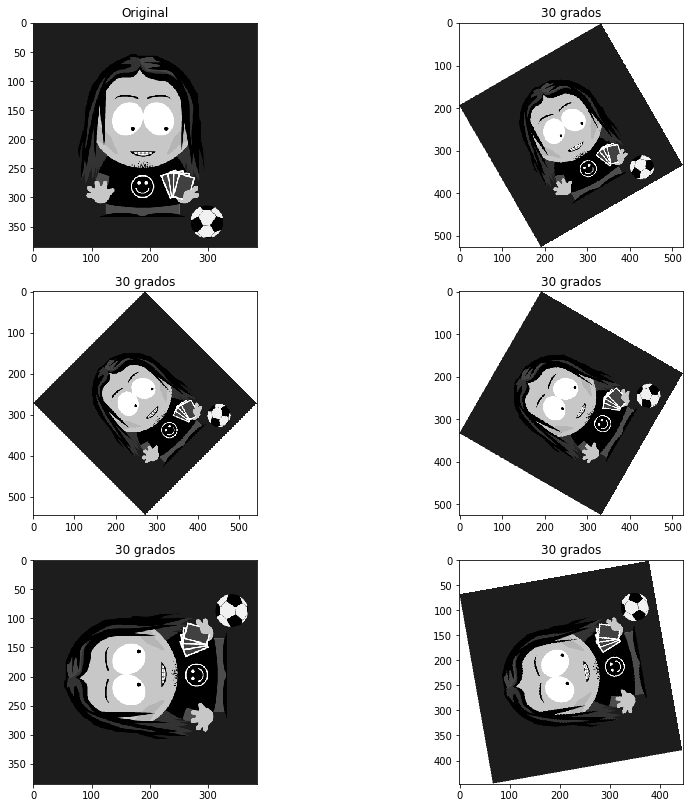

In [12]:
imagen2 = cv2.imread('Ej/example3.jpg',0)
rot1=rotarImagen(imagen2,30)
rot2=rotarImagen(imagen2,45)
rot3=rotarImagen(imagen2,60)
rot4=rotarImagen(imagen2,90)
rot5=rotarImagen(imagen2,100)
plt.figure(1,figsize=(14,14))
plt.subplot(321), plt.imshow(imagen2, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(322), plt.imshow(rot1, cmap=plt.cm.gray), plt.title('30 grados')
plt.subplot(323), plt.imshow(rot2, cmap=plt.cm.gray), plt.title('30 grados')                                                                
plt.subplot(324), plt.imshow(rot3, cmap=plt.cm.gray), plt.title('30 grados')     
plt.subplot(325), plt.imshow(rot4, cmap=plt.cm.gray), plt.title('30 grados')
plt.subplot(326), plt.imshow(rot5, cmap=plt.cm.gray), plt.title('30 grados')                                                                
plt.show()